# Table of Contents
* [1. Data Representation for Machine Learning](#1.-Data-Representation-for-Machine-Learning)
* [2. Example 1: Digits Data](#2.-Example-1:-Digits-Data)
	* [2.1 look at the data](#2.1-look-at-the-data)
	* [2.2 unsupervised - dimensional reduction](#2.2-unsupervised---dimensional-reduction)
	* [2.3 supervised classification](#2.3-supervised-classification)
	* [2.4 why validation - an example of random set](#2.4-why-validation---an-example-of-random-set)
	* [2.5 cross-validation](#2.5-cross-validation)
	* [2.6 confusion matrix](#2.6-confusion-matrix)
* [3. Example 2: microbiome dataset - classfy body sites](#3.-Example-2:-microbiome-dataset---classfy-body-sites)
	* [3.1 data munging and classification](#3.1-data-munging-and-classification)
	* [3.2 Feature importance](#3.2-Feature-importance)
	* [3.3 Receiver Operating Characteristic (ROC)¶](#3.3-Receiver-Operating-Characteristic-%28ROC%29¶)


In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Data Representation for Machine Learning

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

# 2. Example 1: Digits Data

## 2.1 look at the data

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['DESCR', 'target', 'target_names', 'data', 'images'])

In [4]:
n_samples, n_features = digits.data.shape
print(n_samples, n_features)

1797 64


In [5]:
print(digits.target.shape)

(1797,)


In [6]:
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [7]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


In [8]:
print(digits.data[0])


[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [9]:
np.all(digits.images.reshape((1797, 64)) == digits.data)

True

In [10]:
digits.data.__array_interface__

{'data': (4404019200, False),
 'descr': [('', '<f8')],
 'shape': (1797, 64),
 'strides': (520, 8),
 'typestr': '<f8',
 'version': 3}

Let's visualize the data.  It's little bit more involved than the simple scatter-plot
we used above, but we can do it rather quickly.

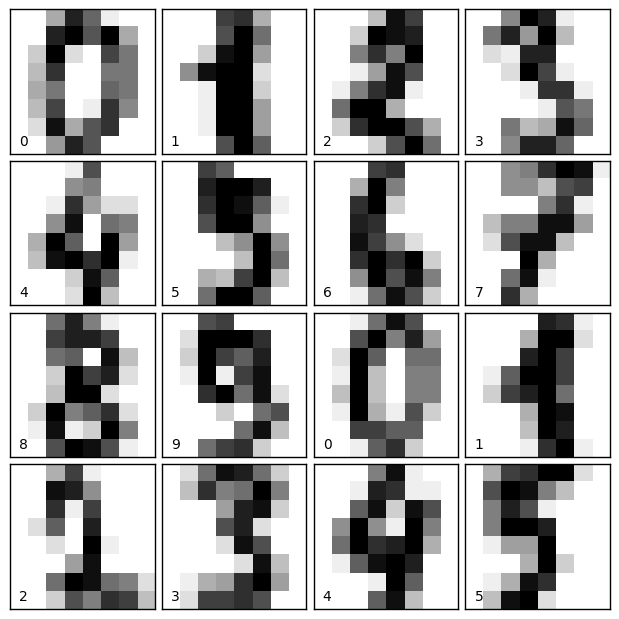

In [11]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the first 16 digits: each image is 8x8 pixels
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## 2.2 unsupervised - dimensional reduction

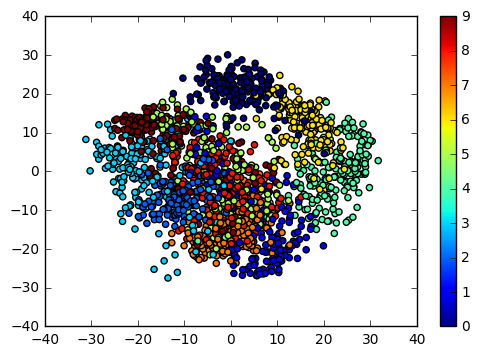

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

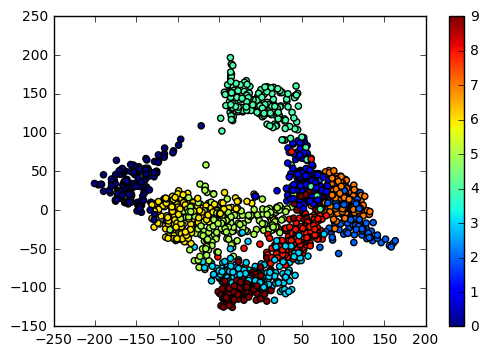

In [29]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

## 2.3 supervised classification

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5)

# train the model
clf = RandomForestClassifier(n_estimators=25, max_depth=3)
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [83]:
accuracy_score(predicted, expected)

0.8654060066740823

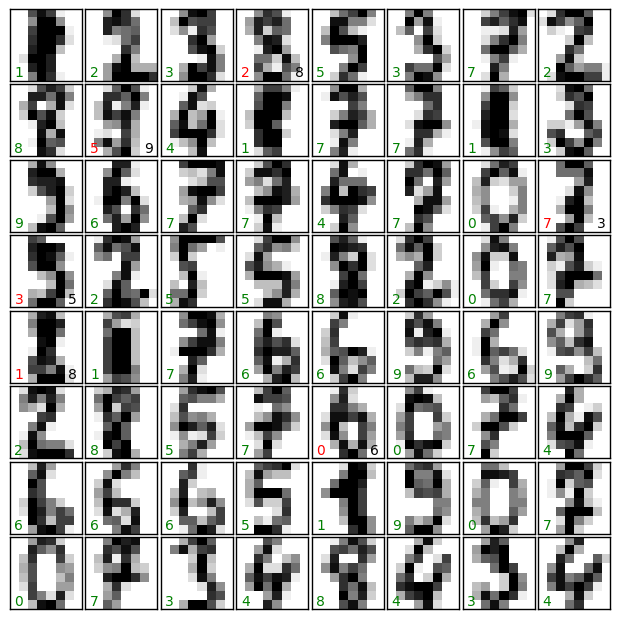

In [84]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')
        ax.text(6, 7, str(expected[i]))

## 2.4 why validation - an example of random set

In [48]:
# create 1000 samples of 100 features. each value 0-1
X = np.random.rand(1000, 100)
y = np.random.choice([0, 1], 1000)
Counter(y)

Counter({0: 489, 1: 511})

In [44]:
# train the model
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X, y)
predicted = clf.predict(X)

In [45]:
accuracy_score(predicted, y)

1.0

In [60]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y)

# train the model
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_r, y_train_r)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test_r)
accuracy_score(predicted, y_test_r)

0.46000000000000002

## 2.5 cross-validation

In [85]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

param_grid = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}
skf = StratifiedKFold(10)
clf = GridSearchCV(RandomForestClassifier(n_estimators=25), cv=skf, param_grid=param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 3, 'min_samples_leaf': 1, 'criterion': 'gini', 'min_samples_split': 1, 'max_depth': None}


In [92]:
from sklearn.metrics import classification_report
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

0.843 (+/-0.039) for {'max_depth': 3, 'criterion': 'gini'}
0.965 (+/-0.026) for {'max_depth': None, 'criterion': 'gini'}
0.853 (+/-0.054) for {'max_depth': 3, 'criterion': 'entropy'}
0.965 (+/-0.024) for {'max_depth': None, 'criterion': 'entropy'}

Detailed classification report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       101
          1       0.94      1.00      0.97        88
          2       0.98      0.99      0.98        92
          3       0.99      0.90      0.94        96
          4       0.96      0.98      0.97        87
          5       0.99      0.92      0.95        84
          6       0.99      0.97      0.98        91
          7       0.97      0.96      0.96        94
          8       0.90      0.95      0.93        80
          9       0.93      0.98      0.95        86

avg / total       0.96      0.96      0.96       899



In [88]:
accuracy_score(y_true, y_pred)

0.96218020022246942

In [89]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [93]:
y_true, y_pred_2 = y_test, clf.best_estimator_.predict(X_test)
np.all(y_pred == y_pred_2)

True

In [96]:
clf.cv_results_

{'mean_fit_time': array([ 0.03281372,  0.05023723,  0.03882818,  0.0583137 ]),
 'mean_score_time': array([ 0.00220859,  0.00256984,  0.00239041,  0.0023854 ]),
 'mean_test_score': array([ 0.84298441,  0.96547884,  0.85300668,  0.96547884]),
 'mean_train_score': array([ 0.89027571,  1.        ,  0.89555827,  1.        ]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'entropy' 'entropy'],
              mask = [False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [3 None 3 None],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'criterion': 'gini', 'max_depth': 3},
  {'criterion': 'gini', 'max_depth': None},
  {'criterion': 'entropy', 'max_depth': 3},
  {'criterion': 'entropy', 'max_depth': None}),
 'rank_test_score': array([4, 1, 3, 1], dtype=int32),
 'split0_test_score': array([ 0.82978723,  0.95744681,  0.88297872,  0.96808511]),
 'split0_train_score': array([ 0.86069652,  1.        ,  0.9141791 ,  1. 

## 2.6 confusion matrix

In [110]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[100   0   0   0   1   0   0   0   0   0]
 [  0  88   0   0   0   0   0   0   0   0]
 [  0   1  91   0   0   0   0   0   0   0]
 [  1   0   2  86   0   0   0   2   5   0]
 [  0   0   0   0  85   0   0   0   0   2]
 [  0   2   0   0   1  77   1   0   1   2]
 [  1   0   0   0   0   1  88   0   1   0]
 [  0   0   0   0   2   0   0  90   0   2]
 [  0   2   0   1   0   0   0   1  76   0]
 [  0   1   0   0   0   0   0   0   1  84]]
Normalized confusion matrix
[[ 0.99  0.    0.    0.    0.01  0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.01  0.99  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.01  0.    0.02  0.9   0.    0.    0.    0.02  0.05  0.  ]
 [ 0.    0.    0.    0.    0.98  0.    0.    0.    0.    0.02]
 [ 0.    0.02  0.    0.    0.01  0.92  0.01  0.    0.01  0.02]
 [ 0.01  0.    0.    0.    0.    0.01  0.97  0.    0.01  0.  ]
 [ 0.    0.    0.    0.    0.02  0.    0.    0.96  0.    0.0

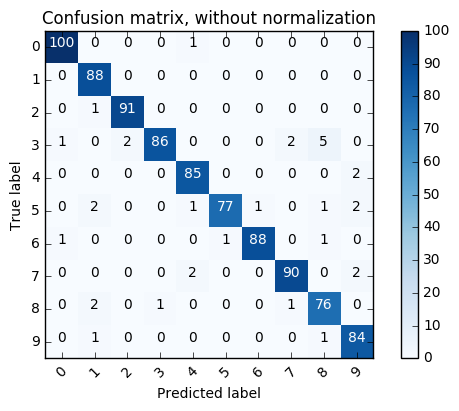

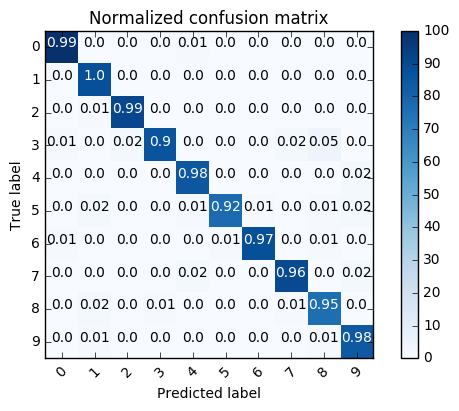

In [111]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(10),
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.99  0.    0.    0.    0.01  0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.01  0.99  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.01  0.    0.02  0.9   0.    0.    0.    0.02  0.05  0.  ]
 [ 0.    0.    0.    0.    0.98  0.    0.    0.    0.    0.02]
 [ 0.    0.02  0.    0.    0.01  0.92  0.01  0.    0.01  0.02]
 [ 0.01  0.    0.    0.    0.    0.01  0.97  0.    0.01  0.  ]
 [ 0.    0.    0.    0.    0.02  0.    0.    0.96  0.    0.02]
 [ 0.    0.03  0.    0.01  0.    0.    0.    0.01  0.95  0.  ]
 [ 0.    0.01  0.    0.    0.    0.    0.    0.    0.01  0.98]]


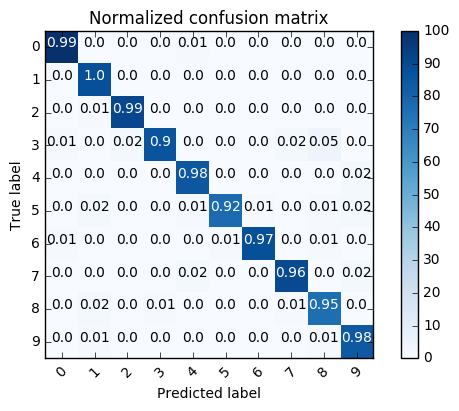

In [112]:
# Plot normalized confusion matrix
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')


# 3. Example 2: microbiome dataset - classfy body sites

## 3.1 data munging and classification

In [248]:
otu = pd.read_table('CBH_otu_13-5.txt', skiprows=1, index_col=0)
taxa = otu['taxonomy']
otu = otu.drop(axis=1, labels='taxonomy').T
otu.head()

#OTU ID,4408758,259732,570812,973124,127012,2221284,673010,410908,673019,755282,...,222818,369734,4373680,1085175,2912622,4439443,225846,2063454,4438608,858026
M41Indl,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F31Mout,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M41Plmr,5.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,...,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M22Indl,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M41Mout,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
label = pd.read_table('CBH_labels.txt', index_col=0).loc[otu.index, :]
label.head()

,label
M41Indl,Skin
F31Mout,Oral_cavity
M41Plmr,Skin
M22Indl,Skin
M41Mout,Oral_cavity


In [209]:
label.label.value_counts()

Skin           344
Oral_cavity     46
Nostril         44
EAC             43
Gut             43
Hair            14
Name: label, dtype: int64

In [210]:
label2 = label[label['label'].isin(['Skin', 'Oral_cavity'])]

In [211]:
otu2 = otu.loc[label2.index, :]

In [240]:
X = otu2.values

In [221]:
X.shape

(390, 2846)

In [222]:
y = np.array([0 if i == 'Skin' else 1 for i in label2.label])

In [241]:
param_grid = {"max_depth": [3, None],
              "criterion": ["gini", "entropy"]}
skf = StratifiedKFold(10)
clf = GridSearchCV(RandomForestClassifier(n_estimators=10), cv=skf, param_grid=param_grid)
clf.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [224]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.987 (+/-0.034) for {'max_depth': 3, 'criterion': 'gini'}
0.997 (+/-0.015) for {'max_depth': None, 'criterion': 'gini'}
0.985 (+/-0.041) for {'max_depth': 3, 'criterion': 'entropy'}
0.992 (+/-0.023) for {'max_depth': None, 'criterion': 'entropy'}


## 3.2 Feature importance

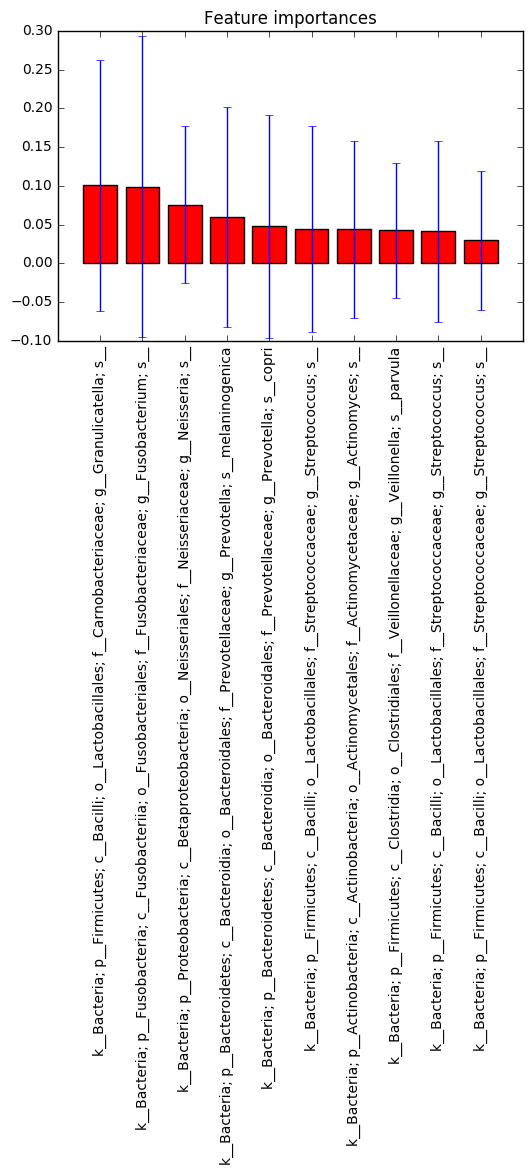

In [252]:
forest = clf.best_estimator_
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:10]
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(10), taxa.iloc[indices], rotation=90)
plt.xlim([-1, 10])
plt.show()

## 3.3 Receiver Operating Characteristic (ROC)¶

In [217]:
from scipy import interp
from sklearn.metrics import roc_curve, auc

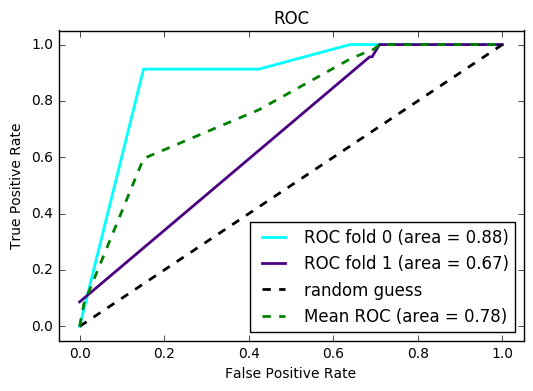

In [234]:
X = X[:, :12]
cv = StratifiedKFold(n_splits=2)
clf = RandomForestClassifier(n_estimators=25)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = ['cyan', 'indigo']
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='random guess')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")